# QF 627 Extras - Financial Analytics
## Problem Set `6` | `RE`view

> Hi Team! 👋

> The current problem set contains three sets of questions. Of these, two focus on applying synthetic control methods. The third question is designed to give you practice in identifying the most appropriate causal inference method from econometrics.

> As always, these questions are meant to deepen your understanding and support your preparation for the final assessment. You're encouraged to approach them using your own reasoning and effort, rather than simply relying on generative AI tools. While it’s fine to seek help from GenAI as part of the learning process, solely relying on it won't lead you to valid solutions—as you may have already experienced—nor will it serve your long-term learning and growth.

> This is a practice set, so there is no strict time limit. Feel free to take the opportunity to experiment, iterate, and learn through trial and error. Break problems down into smaller steps, try out simulations, and document your thinking process. Solving mathematical, quantitative, or analytics problems—especially in real-world contexts—is not about instantly arriving at the correct answer. It's about working through the complexity to develop your own solution. That’s where real learning happens.

> As some of you may recall from behavioral finance, natural (human) intelligence systems tend to have myopic time preferences. While AI-generated answers may provide quick assistance with weekly problem sets, they don’t prepare you for real-world decision-making or for success in our final assessment session. Rome, after all, wasn’t built in a day—true excellence takes time, commitment, and effort. Many aspire to be great, but few are willing to do what it takes to truly get there.

> Once again, I appreciate the effort you're putting into these questions. I look forward to reading your work and supporting your continued learning journey.

> Enjoy the process 🤗

### <font color = green> Activation of necessary libraries for setting your print options

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

### <mark>Import the below function provided by Prof. Roh into your working environment to enable algorithmic decision aids based on causal inference methods.</mark>

In [2]:
def would_you_recommend_causal_inference_method():
    print("Welcome to the Causal Inference Recommender architected by Prof. Roh :)")
    print("Please answer to the following questions with either 'yes' or 'no'.\n")

    # Question 1. RCT Feasibility (from observation to intervention)
    can_randomized =\
    (
        input("Question 1: Can we RANDOMIZE the treatment assignment? (yes / no): ")
        .strip()
        .lower()
    )
    
    if can_randomized == "yes":
        print("\nRecommended Method: **RCTs (Randomized Controlled Trials)**")
        return

    # Question 2. Threshold for RDD
    has_threshold =\
    (input("Question 2: Is there a threshold that assigns treatment (e.g., cut-off) (yes / no): ?")
     .strip()
     .lower()
    )
    
    if has_threshold == "yes":
        print("\nRecommended Method: **RDD (Regression Discontinuity Design)")
        return

    # Question 3. Check for Panel (vs. Cross-sectional) or Time-Series Data
    has_panel_data =\
    (input("Question 3: Do we have panel (longitudinal) or repeated Cross-Sectional Data over Time? (yes / no): ")
     .strip()
     .lower()
    )
    
    if has_panel_data == "yes":
        # contingency

        # Question 4. Do we have single or multiple treated units
        single_treated =\
        (
         input("Question 4: Do you have ONLY ONE treated unit (e.g., one city, one district)? (yes / no): ")
            .strip()
            .lower()
        )
        
        if single_treated == "yes":
            
            parallel_trends =\
            (
                input("Question 5: Are we confident the 'parallel trends' assumption would hold if you used a DiD? (yes / no): ")
                .strip()
                .lower()
            )

            if parallel_trends == "yes":
                print("\nParallel trends might hold, but you still only have ONE TREATED UNIT...")
                print("\nRecommended Method: **Difference-in-Differences is fine.**"
                     )
            else:
                print("\nSince parallel trends are questionable and there's only ONE TREATED UNIT...")
                print("\nRecommended Method: **Synthetic Control**")
            return

        else: 
            parallel_trends = input("Question 5: Can we assume paraell trends with multiple treated units? (yes / no ): ").strip().lower()
            if parallel_trends == "yes":
                print("\nRecommended Method: **Difference-in-Differences (DiD) ** ")
                return
            else: 
                print("\nParallel trends are questionable for multiple treated units.")
                print("\nTeam, you should consider more advanced methods as follows:")
                print("\n - Matching along with DiD (to align pre-trends on a matched sample.")
                print("\n - Synthetic Control for subsets if feasible")
                print("\n - More advanced methods ... call Prof. Roh :)")
                return

    else: 
        print("\n Recommended Method: **Matching** (Propensity Scoring and Inverse Probability Weights (**IPW**).")
        return

## <font color = red> Below, you will find `three larger sets` of questions. 
    
## <font color = purple> Please ensure that you demonstrate the workflow of your problem-solving process for these analytics questions. 
    
## <font color = purple> Specifically, follow these steps: import → wrangle → EDA → further wrangle (if necessary) → visualize and/or model → refine the model and/or visualization → report.

## ❓ <a id = "top"> List of Analytic Questions </a> ❓

## [Q1. Causal Effects of Brexit on the UK’s Economy](#p1)

> ### <font color = red> Use Synthetic Control </font>

## [Q2. Fiscal Policy 101: Resolving the Debate by Assessing the Effects of Minimum Wage Policy](#p2)

> ### <font color = red> Identify the econometric method of causal inference that would be valid for addressing the given problem.  </font>

## [Q3. Economic Impact of German Reunification](#p3)

> ### <font color = red> Again, Use Synthetic Control </font>

## <a id = "p1"></a><font color = blue> 👉 Big Questions 1</font>  [back to table of contents](#top)
    
### <font color = green> BUSINESS CONTEXT & ANALYTIC QUESTION

    Synthetic Control Calculations

> You are tasked with estimating the causal effect of Brexit on the UK using normalized GDP as the outcome variable, through the application of the Synthetic Control Method.

### Model Specifications

> Conduct your analysis under the following two model specifications:

- `Model A`: Use all 52 countries in the dataset to construct the synthetic control.

- `Model B`: Use a subset of countries selected based on domain knowledge or macroeconomic similarity to the UK.

    Note: As in previous questions, data wrangling is critical to ensure proper alignment of time periods, normalization of variables, and consistency across country panels.

### Visualizations of Causal Effects

> Please include the following plots in your report, using `lets-plot`:

- `Panel A`: Time-series plot of normalized GDP for all countries, with the UK highlighted in red.

- `Panel B`: Plot comparing actual UK GDP vs. synthetic UK GDP over time.

- `Panel C`: A causal impact plot displaying the difference between the actual UK GDP and the synthetic UK GDP over time—i.e., the estimated treatment effect of Brexit.

- `Panel D`: Bar chart or table summarizing the weights assigned to each donor country in the synthetic control construction.

### <mark> Dataset </mark> https://talktoroh.com/s/impact_of_brexit.csv

### <font color = red> IMPORT

In [3]:
data1 =\
(
    pd
    .read_csv("https://talktoroh.com/s/impact_of_brexit.csv",
              parse_dates = ["Time"]
             )
)

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Time         53 non-null     datetime64[ns]
 1   Australia    53 non-null     float64       
 2   Austria      53 non-null     float64       
 3   Belgium      53 non-null     float64       
 4   Canada       53 non-null     float64       
 5   Denmark      53 non-null     float64       
 6   Finland      53 non-null     float64       
 7   France       53 non-null     float64       
 8   Germany      53 non-null     float64       
 9   Iceland      53 non-null     float64       
 10  Luxemburg    53 non-null     float64       
 11  Netherlands  53 non-null     float64       
 12  New_Zealand  53 non-null     float64       
 13  Norway       53 non-null     float64       
 14  Sweden       53 non-null     float64       
 15  Switzerland  53 non-null     float64       
 16  UK        

In [5]:
data1.head(3)

,Time,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Iceland,Luxemburg,Netherlands,New_Zealand,Norway,Sweden,Switzerland,UK
0,2009-01-01,3.84048,0.802836,0.94117,16.93824,4.50096,0.51052,5.05450,6.63471,5.18157,0.114836,1.634391,0.47336,7.78753,10.32220,1.476532,4.61881
1,2009-04-01,3.86954,0.796545,0.94162,16.75340,4.41372,0.50829,5.05375,6.64530,5.16171,0.116259,1.634432,0.47916,7.71903,10.32867,1.485509,4.60431
2,2009-07-01,3.88115,0.799937,0.95352,16.82878,4.42898,0.51299,5.06237,6.68237,5.24132,0.118747,1.640982,0.48188,7.72400,10.32328,1.502506,4.60722


In [6]:
data1.dtypes

Time           datetime64[ns]
Australia             float64
Austria               float64
Belgium               float64
Canada                float64
Denmark               float64
Finland               float64
France                float64
Germany               float64
Iceland               float64
Luxemburg             float64
Netherlands           float64
New_Zealand           float64
Norway                float64
Sweden                float64
Switzerland           float64
UK                    float64
dtype: object

### <font color = red> WRANGLE </font>

In [7]:
data1_LONG =\
(
    data1
    .melt(id_vars = "Time", # .pivot()
          var_name = "Countries",
          value_name = "GDP")
    .assign(year = lambda x: x["Time"].dt.year)
    # Modularize
) # Brexit: 2020 February

In [8]:
data1_LONG

,Time,Countries,GDP,year
0,2009-01-01,Australia,3.84048,2009
1,2009-04-01,Australia,3.86954,2009
2,2009-07-01,Australia,3.88115,2009
3,2009-10-01,Australia,3.91028,2009
4,2010-01-01,Australia,3.92716,2010
...,...,...,...,...
843,2021-01-01,UK,5.23440,2021
844,2021-04-01,UK,5.52521,2021
845,2021-07-01,UK,5.57700,2021
846,2021-10-01,UK,5.64812,2021


In [9]:
data1_LONG_norm_GDP =\
(
    data1_LONG
    .groupby("Countries") # will take the index
    .apply(lambda x: x.assign(normalized_GDP = x["GDP"] / x.loc[x["Time"] < "2020-02-01", "GDP"].mean()
                                                                  #.loc[ Row of interest, Column of interest]
                             )
          )
    .reset_index(drop = True)
)

/var/folders/k1/7yl62fwx2879_758cjywcjrw0000gn/T/ipykernel_91404/958937195.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.assign(normalized_GDP = x["GDP"] / x.loc[x["Time"] < "2020-02-01", "GDP"].mean()


In [10]:
data1_LONG_norm_GDP

,Time,Countries,GDP,year,normalized_GDP
0,2009-01-01,Australia,3.84048,2009,0.862490
1,2009-04-01,Australia,3.86954,2009,0.869016
2,2009-07-01,Australia,3.88115,2009,0.871623
3,2009-10-01,Australia,3.91028,2009,0.878165
4,2010-01-01,Australia,3.92716,2010,0.881956
...,...,...,...,...,...
843,2021-01-01,UK,5.23440,2021,1.022933
844,2021-04-01,UK,5.52521,2021,1.079764
845,2021-07-01,UK,5.57700,2021,1.089885
846,2021-10-01,UK,5.64812,2021,1.103784


### <font color = red> Exploratory Data Analysis </font>

In [11]:
# n_of_countries =\
len(
    data1_LONG_norm_GDP
    ["Countries"]
    .unique()
    .tolist()
)

16

In [12]:
data1_LONG_norm_GDP.head(3)

,Time,Countries,GDP,year,normalized_GDP
0,2009-01-01,Australia,3.84048,2009,0.862490
1,2009-04-01,Australia,3.86954,2009,0.869016
2,2009-07-01,Australia,3.88115,2009,0.871623


In [13]:
for_time_windows =\
sorted(
    data1_LONG_norm_GDP
    ["year"]
    .unique()
)

In [14]:
for_time_windows[0] - for_time_windows[-1]

np.int32(-13)

In [15]:
df = data1_LONG_norm_GDP.copy()

### <font color = red> Modeling </font>

In [16]:
pre_brexit =\
(
    df
    [df["Time"] < "2020-02-01"]
)

In [17]:
pre_brexit

,Time,Countries,GDP,year,normalized_GDP
0,2009-01-01,Australia,3.84048,2009,0.862490
1,2009-04-01,Australia,3.86954,2009,0.869016
2,2009-07-01,Australia,3.88115,2009,0.871623
3,2009-10-01,Australia,3.91028,2009,0.878165
4,2010-01-01,Australia,3.92716,2010,0.881956
...,...,...,...,...,...
835,2019-01-01,UK,5.62033,2019,1.098353
836,2019-04-01,UK,5.62779,2019,1.099811
837,2019-07-01,UK,5.65362,2019,1.104859
838,2019-10-01,UK,5.65109,2019,1.104364


In [18]:
timeframes_pre_brexit_sorted =\
sorted(
    pre_brexit
    ["Time"]
    .unique()
)

In [19]:
timeframes_pre_brexit_sorted

[Timestamp('2009-01-01 00:00:00'),
 Timestamp('2009-04-01 00:00:00'),
 Timestamp('2009-07-01 00:00:00'),
 Timestamp('2009-10-01 00:00:00'),
 Timestamp('2010-01-01 00:00:00'),
 Timestamp('2010-04-01 00:00:00'),
 Timestamp('2010-07-01 00:00:00'),
 Timestamp('2010-10-01 00:00:00'),
 Timestamp('2011-01-01 00:00:00'),
 Timestamp('2011-04-01 00:00:00'),
 Timestamp('2011-07-01 00:00:00'),
 Timestamp('2011-10-01 00:00:00'),
 Timestamp('2012-01-01 00:00:00'),
 Timestamp('2012-04-01 00:00:00'),
 Timestamp('2012-07-01 00:00:00'),
 Timestamp('2012-10-01 00:00:00'),
 Timestamp('2013-01-01 00:00:00'),
 Timestamp('2013-04-01 00:00:00'),
 Timestamp('2013-07-01 00:00:00'),
 Timestamp('2013-10-01 00:00:00'),
 Timestamp('2014-01-01 00:00:00'),
 Timestamp('2014-04-01 00:00:00'),
 Timestamp('2014-07-01 00:00:00'),
 Timestamp('2014-10-01 00:00:00'),
 Timestamp('2015-01-01 00:00:00'),
 Timestamp('2015-04-01 00:00:00'),
 Timestamp('2015-07-01 00:00:00'),
 Timestamp('2015-10-01 00:00:00'),
 Timestamp('2016-01-

### UK before Brexit

In [20]:
pre_brexit.columns

Index(['Time', 'Countries', 'GDP', 'year', 'normalized_GDP'], dtype='object')

In [21]:
uk_before_brexit =\
(
    pre_brexit
    [pre_brexit["Countries"] == "UK"]
    .set_index("Time")
    .loc[timeframes_pre_brexit_sorted, "normalized_GDP"] # rows, columns of our interest
    .values
) # before Brexit UK array

In [22]:
uk_before_brexit

array([0.903, 0.9  , 0.9  , 0.903, 0.909, 0.92 , 0.926, 0.927, 0.932,
       0.933, 0.936, 0.937, 0.943, 0.943, 0.954, 0.952, 0.956, 0.962,
       0.97 , 0.975, 0.984, 0.992, 0.999, 1.004, 1.011, 1.018, 1.024,
       1.031, 1.035, 1.041, 1.046, 1.053, 1.06 , 1.064, 1.068, 1.072,
       1.075, 1.081, 1.088, 1.091, 1.098, 1.1  , 1.105, 1.104, 1.076])

### Generate Synthetic UK with weights

In [23]:
def calculate_weights(donors, uk):
    n = donors.shape[1] # how many donors?
    initialization = np.ones(n) / n # initiaze at equal weights! yes yes yes
    constraints =\
    (
        {"type": "eq", "fun": lambda w: np.sum(w) - 1}, # we have to make sure to calculate sum-to-one
        {"type": "ineq", "fun": lambda w: w}# ---------------------------- non-negative values
    )
    results =\
    ( # RMSPE --> Decomposition of Variance is the core and at the heart of quant. modeling :)
        minimize(lambda w: np.sum((uk - donors.dot(w)
                                  ) ** 2
                                 ),
                 initialization,
                 constraints = constraints
                )
    )
    return results.x

### All Donors Model

In [24]:
%who

calculate_weights	 data1	 data1_LONG	 data1_LONG_norm_GDP	 df	 for_time_windows	 mpl	 np	 pd	 
plt	 pre_brexit	 timeframes_pre_brexit_sorted	 uk_before_brexit	 would_you_recommend_causal_inference_method	 


In [25]:
uk_before_brexit

array([0.903, 0.9  , 0.9  , 0.903, 0.909, 0.92 , 0.926, 0.927, 0.932,
       0.933, 0.936, 0.937, 0.943, 0.943, 0.954, 0.952, 0.956, 0.962,
       0.97 , 0.975, 0.984, 0.992, 0.999, 1.004, 1.011, 1.018, 1.024,
       1.031, 1.035, 1.041, 1.046, 1.053, 1.06 , 1.064, 1.068, 1.072,
       1.075, 1.081, 1.088, 1.091, 1.098, 1.1  , 1.105, 1.104, 1.076])

In [26]:
pre_brexit.head(3)

,Time,Countries,GDP,year,normalized_GDP
0,2009-01-01,Australia,3.84048,2009,0.862490
1,2009-04-01,Australia,3.86954,2009,0.869016
2,2009-07-01,Australia,3.88115,2009,0.871623


In [27]:
donors_model_a =\
    [country for country
             in pre_brexit["Countries"].unique()
             if country != "UK"
    ] # all countries except UK from before Brexit

In [28]:
donors_model_a

['Australia',
 'Austria',
 'Belgium',
 'Canada',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Iceland',
 'Luxemburg',
 'Netherlands',
 'New_Zealand',
 'Norway',
 'Sweden',
 'Switzerland']

In [29]:
pre_brexit.head(3)

,Time,Countries,GDP,year,normalized_GDP
0,2009-01-01,Australia,3.84048,2009,0.862490
1,2009-04-01,Australia,3.86954,2009,0.869016
2,2009-07-01,Australia,3.88115,2009,0.871623


In [30]:
%who

calculate_weights	 data1	 data1_LONG	 data1_LONG_norm_GDP	 df	 donors_model_a	 for_time_windows	 mpl	 np	 
pd	 plt	 pre_brexit	 timeframes_pre_brexit_sorted	 uk_before_brexit	 would_you_recommend_causal_inference_method	 


In [31]:
donors_model_a_array =\
(
    pre_brexit
    [pre_brexit["Countries"].isin(donors_model_a)
    ]
    .pivot(index = "Time",
           columns = "Countries",
           values = "normalized_GDP")
    .loc[timeframes_pre_brexit_sorted]
    .values
)

In [32]:
%who

calculate_weights	 data1	 data1_LONG	 data1_LONG_norm_GDP	 df	 donors_model_a	 donors_model_a_array	 for_time_windows	 mpl	 
np	 pd	 plt	 pre_brexit	 timeframes_pre_brexit_sorted	 uk_before_brexit	 would_you_recommend_causal_inference_method	 


In [33]:
uk_before_brexit

array([0.903, 0.9  , 0.9  , 0.903, 0.909, 0.92 , 0.926, 0.927, 0.932,
       0.933, 0.936, 0.937, 0.943, 0.943, 0.954, 0.952, 0.956, 0.962,
       0.97 , 0.975, 0.984, 0.992, 0.999, 1.004, 1.011, 1.018, 1.024,
       1.031, 1.035, 1.041, 1.046, 1.053, 1.06 , 1.064, 1.068, 1.072,
       1.075, 1.081, 1.088, 1.091, 1.098, 1.1  , 1.105, 1.104, 1.076])

In [34]:
from scipy.optimize import minimize

In [35]:
## Let's use our function that help us calculate weights

weights_model_a = calculate_weights(donors_model_a_array, uk_before_brexit)

In [36]:
weights_model_a

array([ 1.057e-01,  2.034e-19,  4.659e-02, -6.635e-19,  7.079e-02,
        4.054e-18,  4.042e-02,  2.577e-02,  2.993e-02,  2.132e-01,
        1.331e-18, -5.759e-18,  2.341e-01,  9.107e-02,  1.425e-01])

In [37]:
df_with_weights_model_a =\
(
    pd
    .DataFrame({"countries": donors_model_a, # 2d --> 1d
                "weights": weights_model_a
               }
              )
    .sort_values("weights",
                 ascending = False) # by default, it sorts assending order
    .reset_index(drop = True)
)

### Selected Donors Model

#### How to select donors? Here's one solution :)

In [38]:
%who

calculate_weights	 data1	 data1_LONG	 data1_LONG_norm_GDP	 df	 df_with_weights_model_a	 donors_model_a	 donors_model_a_array	 for_time_windows	 
minimize	 mpl	 np	 pd	 plt	 pre_brexit	 timeframes_pre_brexit_sorted	 uk_before_brexit	 weights_model_a	 
would_you_recommend_causal_inference_method	 


In [39]:
df_WIDE_to_choose_donors =\
(
    pre_brexit
    .pivot(index = "Time",
           columns = "Countries",
           values = "normalized_GDP")
)

In [40]:
corr_with_uk =\
(
    df_WIDE_to_choose_donors
    .corrwith(df_WIDE_to_choose_donors["UK"] # we'd like to calculate corr between each column and UK --> yes yes yes
             )
    .drop("UK")
    .sort_values(ascending = False)
)

In [41]:
corr_with_uk.head(5)

Countries
Switzerland    0.993116
Australia      0.991072
Luxemburg      0.991010
Belgium        0.987724
Sweden         0.986642
dtype: float64

In [42]:
corr_with_uk.head(8)

Countries
Switzerland    0.993116
Australia      0.991072
Luxemburg      0.991010
Belgium        0.987724
Sweden         0.986642
New_Zealand    0.985644
Canada         0.984251
Norway         0.983891
dtype: float64

> Team, in the field practice, please run `sensitivity analysis` here.

In [43]:
donors_model_b =\
(
    corr_with_uk
    .head(5) # here, the n within head() should be iterables for sensitivity analysis
    .index
    .tolist()
) 

In [44]:
donors_model_b

['Switzerland', 'Australia', 'Luxemburg', 'Belgium', 'Sweden']

In [45]:
donors_model_b_array =\
(
    pre_brexit
    [pre_brexit["Countries"].isin(donors_model_b)
    ]
    .pivot(index = "Time",
           columns = "Countries",
           values = "normalized_GDP")
    .loc[timeframes_pre_brexit_sorted]
    .values
)

In [46]:
%who

calculate_weights	 corr_with_uk	 data1	 data1_LONG	 data1_LONG_norm_GDP	 df	 df_WIDE_to_choose_donors	 df_with_weights_model_a	 donors_model_a	 
donors_model_a_array	 donors_model_b	 donors_model_b_array	 for_time_windows	 minimize	 mpl	 np	 pd	 plt	 
pre_brexit	 timeframes_pre_brexit_sorted	 uk_before_brexit	 weights_model_a	 would_you_recommend_causal_inference_method	 


In [47]:
uk_before_brexit

array([0.903, 0.9  , 0.9  , 0.903, 0.909, 0.92 , 0.926, 0.927, 0.932,
       0.933, 0.936, 0.937, 0.943, 0.943, 0.954, 0.952, 0.956, 0.962,
       0.97 , 0.975, 0.984, 0.992, 0.999, 1.004, 1.011, 1.018, 1.024,
       1.031, 1.035, 1.041, 1.046, 1.053, 1.06 , 1.064, 1.068, 1.072,
       1.075, 1.081, 1.088, 1.091, 1.098, 1.1  , 1.105, 1.104, 1.076])

In [48]:
donors_model_b

['Switzerland', 'Australia', 'Luxemburg', 'Belgium', 'Sweden']

In [49]:
weights_model_b = calculate_weights(donors_model_b_array, uk_before_brexit)

In [50]:
df_with_weights_model_a

,countries,weights
0,Norway,2.340631e-01
1,Luxemburg,2.131855e-01
2,Switzerland,1.424642e-01
3,Australia,1.057079e-01
4,Sweden,9.107440e-02
5,Denmark,7.079487e-02
6,Belgium,4.658915e-02
7,France,4.042387e-02
8,Iceland,2.992553e-02
9,Germany,2.577146e-02


In [51]:
df_with_weights_model_b =\
(
    pd
    .DataFrame({"countries": donors_model_b,
                "weights": weights_model_b}
              )
    .sort_values("weights",
                 ascending = False) # make it into descending order
    .reset_index(drop = True)
)

### <font color = red> Visualization </font> 

In [52]:
entire_timewindow =\
sorted(
    df # DataFrame
    ["Time"] # Time Series
    .unique() # unique
)

In [53]:
df.columns

Index(['Time', 'Countries', 'GDP', 'year', 'normalized_GDP'], dtype='object')

In [54]:
%who

calculate_weights	 corr_with_uk	 data1	 data1_LONG	 data1_LONG_norm_GDP	 df	 df_WIDE_to_choose_donors	 df_with_weights_model_a	 df_with_weights_model_b	 
donors_model_a	 donors_model_a_array	 donors_model_b	 donors_model_b_array	 entire_timewindow	 for_time_windows	 minimize	 mpl	 np	 
pd	 plt	 pre_brexit	 timeframes_pre_brexit_sorted	 uk_before_brexit	 weights_model_a	 weights_model_b	 would_you_recommend_causal_inference_method	 


In [55]:
type(donors_model_a)

list

In [56]:
synthetic_a =\
(
    df
    [df["Countries"].isin(donors_model_a)
    ]
    .pivot(index = "Time",
           columns = "Countries",
           values = "normalized_GDP")
    .values
    @ weights_model_a
)

In [57]:
synthetic_a

array([0.894, 0.895, 0.902, 0.906, 0.916, 0.922, 0.917, 0.929, 0.933,
       0.934, 0.942, 0.942, 0.95 , 0.951, 0.952, 0.958, 0.96 , 0.969,
       0.974, 0.975, 0.983, 0.984, 0.994, 1.005, 1.005, 1.012, 1.018,
       1.02 , 1.029, 1.037, 1.04 , 1.049, 1.049, 1.06 , 1.067, 1.072,
       1.078, 1.083, 1.087, 1.092, 1.097, 1.104, 1.106, 1.112, 1.095,
       1.022, 1.09 , 1.1  , 1.108, 1.122, 1.141, 1.153, 1.155])

In [58]:
synthetic_b =\
(
    df
    [df["Countries"].isin(donors_model_b)
    ]
    .pivot(index = "Time",
           columns = "Countries",
           values = "normalized_GDP")
    .values
    @ weights_model_b
)

### Let's build DataFrame to Compare

In [59]:
%who

calculate_weights	 corr_with_uk	 data1	 data1_LONG	 data1_LONG_norm_GDP	 df	 df_WIDE_to_choose_donors	 df_with_weights_model_a	 df_with_weights_model_b	 
donors_model_a	 donors_model_a_array	 donors_model_b	 donors_model_b_array	 entire_timewindow	 for_time_windows	 minimize	 mpl	 np	 
pd	 plt	 pre_brexit	 synthetic_a	 synthetic_b	 timeframes_pre_brexit_sorted	 uk_before_brexit	 weights_model_a	 weights_model_b	 
would_you_recommend_causal_inference_method	 


In [60]:
observed_normalized_gdp_of_uk =\
(
    df
    [df["Countries"] == "UK"
    ]
     .set_index("Time")
     .loc[entire_timewindow, "normalized_GDP"]
     .values
)

In [61]:
%who

calculate_weights	 corr_with_uk	 data1	 data1_LONG	 data1_LONG_norm_GDP	 df	 df_WIDE_to_choose_donors	 df_with_weights_model_a	 df_with_weights_model_b	 
donors_model_a	 donors_model_a_array	 donors_model_b	 donors_model_b_array	 entire_timewindow	 for_time_windows	 minimize	 mpl	 np	 
observed_normalized_gdp_of_uk	 pd	 plt	 pre_brexit	 synthetic_a	 synthetic_b	 timeframes_pre_brexit_sorted	 uk_before_brexit	 weights_model_a	 
weights_model_b	 would_you_recommend_causal_inference_method	 


In [62]:
synthetic_a

array([0.894, 0.895, 0.902, 0.906, 0.916, 0.922, 0.917, 0.929, 0.933,
       0.934, 0.942, 0.942, 0.95 , 0.951, 0.952, 0.958, 0.96 , 0.969,
       0.974, 0.975, 0.983, 0.984, 0.994, 1.005, 1.005, 1.012, 1.018,
       1.02 , 1.029, 1.037, 1.04 , 1.049, 1.049, 1.06 , 1.067, 1.072,
       1.078, 1.083, 1.087, 1.092, 1.097, 1.104, 1.106, 1.112, 1.095,
       1.022, 1.09 , 1.1  , 1.108, 1.122, 1.141, 1.153, 1.155])

In [63]:
comparison_DF =\
(
    pd
    .DataFrame(
        {"Time": entire_timewindow,
         "observed_normalized_GDP": observed_normalized_gdp_of_uk,
         "estimated_normalized_GDP_synthetic_A": synthetic_a,
         "estimated_normalized_GDP_synthetic_B": synthetic_b
        }
    )
) # Modularization

In [64]:
comparison_DF_with_effects =\
(
    comparison_DF
    .assign(effects_A = lambda x: x["observed_normalized_GDP"] - x["estimated_normalized_GDP_synthetic_A"],
            effects_B = lambda x: x["observed_normalized_GDP"] - x["estimated_normalized_GDP_synthetic_B"]
           )
)

In [65]:
comparison_DF_with_effects

,Time,observed_normalized_GDP,estimated_normalized_GDP_synthetic_A,estimated_normalized_GDP_synthetic_B,effects_A,effects_B
0,2009-01-01,0.902631,0.894281,0.882812,0.008350,0.019819
1,2009-04-01,0.899797,0.894800,0.887959,0.004997,0.011839
2,2009-07-01,0.900366,0.901958,0.898848,-0.001592,0.001518
3,2009-10-01,0.903161,0.905854,0.905204,-0.002693,-0.002043
4,2010-01-01,0.909469,0.916387,0.913912,-0.006918,-0.004443
5,2010-04-01,0.919778,0.922116,0.922843,-0.002339,-0.003065
6,2010-07-01,0.926225,0.917186,0.923438,0.009039,0.002787
7,2010-10-01,0.927342,0.929332,0.930308,-0.001989,-0.002965
8,2011-01-01,0.931630,0.932859,0.935602,-0.001229,-0.003971
9,2011-04-01,0.932572,0.933654,0.937143,-0.001082,-0.004571


- `Panel A`: Time-series plot of normalized GDP for all countries, with the UK highlighted in red.

In [66]:
from lets_plot import *
LetsPlot.setup_html()

In [67]:
df.columns

Index(['Time', 'Countries', 'GDP', 'year', 'normalized_GDP'], dtype='object')

In [68]:
panel_a =\
(
    ggplot(df,
           aes(x = "Time",
               y = "normalized_GDP",
               group = "Countries")
           )
    + geom_line(color = "grey",
                alpha = 0.30)
    + geom_line(aes(x = "Time",
                    y = "normalized_GDP"),
                data = df[df["Countries"] == "UK"],
                color = "red",
                size = 1.5
               )
    + labs(title = "Panel A:\nNormalized GDP Time-Series (UK Highlighted in Red)")
)

panel_a.show()

- `Panel B`: Plot comparing actual UK GDP vs. synthetic UK GDP over time.

In [69]:
donors_model_a

['Australia',
 'Austria',
 'Belgium',
 'Canada',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Iceland',
 'Luxemburg',
 'Netherlands',
 'New_Zealand',
 'Norway',
 'Sweden',
 'Switzerland']

In [70]:
donors_model_b

['Switzerland', 'Australia', 'Luxemburg', 'Belgium', 'Sweden']

In [71]:
comparison_DF.columns

Index(['Time', 'observed_normalized_GDP',
       'estimated_normalized_GDP_synthetic_A',
       'estimated_normalized_GDP_synthetic_B'],
      dtype='object')

In [72]:
panel_b =\
(
    ggplot() # don't need to set global settings
    + geom_line(data = comparison_DF,
                mapping = aes(x = "Time",
                              y = "observed_normalized_GDP"),
                color = "red",
                size = 1.1) # observed GDP
    + geom_line(data = comparison_DF,
                mapping = aes(x = "Time",
                              y = "estimated_normalized_GDP_synthetic_A"),
                color = "blue",
               # linetype = "dashed",
                size = 1.1) # synthetic UK based on Model A (all countries)
    + geom_line(data = comparison_DF,
                mapping = aes(x = "Time",
                              y = "estimated_normalized_GDP_synthetic_B"),
                color = "green",
               # linetype = "dashed",
                size = 1.1) # synthetic UK based on Model B (here, selected top 5)
    + labs(title = "Panel B:\nObserved vs. Synthetic (Estimated) UK GDP")
)

panel_b.show()

- `Panel C`: A causal impact plot displaying the difference between the actual UK GDP and the synthetic UK GDP over time—i.e., the estimated treatment effect of Brexit.

In [73]:
comparison_DF_with_effects.columns

Index(['Time', 'observed_normalized_GDP',
       'estimated_normalized_GDP_synthetic_A',
       'estimated_normalized_GDP_synthetic_B', 'effects_A', 'effects_B'],
      dtype='object')

In [74]:
panel_c =\
(
    ggplot(comparison_DF_with_effects,
           aes(x = "Time",
               y = "effects_A")
          )
    + geom_line(color = "red")
    + labs(title = "Panel C:\nEstimated Brexit Effects Over Time (Based on Model A)",
           y = "Causal Effects\n(estimated by Synthetic Control Model A)")
    + geom_hline(yintercept = 0.0,
                 color = "black")
)

panel_c.show()

- `Panel D`: Bar chart or table summarizing the weights assigned to each donor country in the synthetic control construction.

In [75]:
weights_model_a

array([ 1.057e-01,  2.034e-19,  4.659e-02, -6.635e-19,  7.079e-02,
        4.054e-18,  4.042e-02,  2.577e-02,  2.993e-02,  2.132e-01,
        1.331e-18, -5.759e-18,  2.341e-01,  9.107e-02,  1.425e-01])

In [76]:
df_with_weights_model_a.columns 

Index(['countries', 'weights'], dtype='object')

In [77]:
panel_d =\
(
    ggplot(df_with_weights_model_a,
           aes(x = "countries",
               y = "weights")
          )
    + geom_bar(stat = "identity")
    + labs(title = "Panel D:\n Weights from Donor Countries for Synthetic Control Model A")
)

In [78]:
panel_d.show()

In [79]:
panel_d_model_b =\
(
    ggplot(df_with_weights_model_b,
           aes(x = "countries",
               y = "weights")
          )
    + geom_bar(stat = "identity",
               fill = "red")
    + labs(title = "Panel D:\n Weights from Donor Countries for Synthetic Control Model B")
)

panel_d_model_b.show()

In [80]:
gggrid([panel_d, panel_d_model_b],
       ncol = 2)

In [81]:
gggrid([panel_a, panel_b,
        panel_c, panel_d],
       ncol = 1) + ggsize(1000, 2000)

### <mark>Causal Effects Estimation</mark>

### Average drawdown

In [82]:
synthetic_a

array([0.894, 0.895, 0.902, 0.906, 0.916, 0.922, 0.917, 0.929, 0.933,
       0.934, 0.942, 0.942, 0.95 , 0.951, 0.952, 0.958, 0.96 , 0.969,
       0.974, 0.975, 0.983, 0.984, 0.994, 1.005, 1.005, 1.012, 1.018,
       1.02 , 1.029, 1.037, 1.04 , 1.049, 1.049, 1.06 , 1.067, 1.072,
       1.078, 1.083, 1.087, 1.092, 1.097, 1.104, 1.106, 1.112, 1.095,
       1.022, 1.09 , 1.1  , 1.108, 1.122, 1.141, 1.153, 1.155])

In [83]:
observed_normalized_gdp_of_uk

array([0.903, 0.9  , 0.9  , 0.903, 0.909, 0.92 , 0.926, 0.927, 0.932,
       0.933, 0.936, 0.937, 0.943, 0.943, 0.954, 0.952, 0.956, 0.962,
       0.97 , 0.975, 0.984, 0.992, 0.999, 1.004, 1.011, 1.018, 1.024,
       1.031, 1.035, 1.041, 1.046, 1.053, 1.06 , 1.064, 1.068, 1.072,
       1.075, 1.081, 1.088, 1.091, 1.098, 1.1  , 1.105, 1.104, 1.076,
       0.867, 1.02 , 1.035, 1.023, 1.08 , 1.09 , 1.104, 1.112])

In [84]:
effects_synthetic_control_model_A = observed_normalized_gdp_of_uk - synthetic_a

In [85]:
comparison_DF_with_effects.head(2)

,Time,observed_normalized_GDP,estimated_normalized_GDP_synthetic_A,estimated_normalized_GDP_synthetic_B,effects_A,effects_B
0,2009-01-01,0.902631,0.894281,0.882812,0.008350,0.019819
1,2009-04-01,0.899797,0.894800,0.887959,0.004997,0.011839


In [86]:
effects_post_brexit =\
(
    comparison_DF_with_effects
    ["effects_A"]
    .loc[comparison_DF_with_effects["Time"] >= pd.Timestamp("2020-02-01")
         ]
)

In [87]:
print(f"Average post-brexit drawdown: {effects_post_brexit.mean() * 100: .2f} percentage points (estimated by Synthetic Control Model A).")

Average post-brexit drawdown: -7.00 percentage points (estimated by Synthetic Control Model A).


### Maximum drawdown

In [88]:
print(f"Maximum drawdown: {effects_post_brexit.min() * 100: .2f} percentage points (estimated by Synthetic Control Model A).")

Maximum drawdown: -15.45 percentage points (estimated by Synthetic Control Model A).


## <a id = "p2"></a><font color = blue> 👉 Big Questions 2</font>  [back to table of contents](#top)

### <font color = green> ANALYTICS CONTEXT

> The effect of minimum wage policies on employment is a central question in fiscal policy debates—one that can be rigorously examined using econometric methods of causal inference.

> As a data scientist at the International Monetary Fund (IMF), you are tasked with evaluating the impact of a minimum wage increase on employment in the fast-food industry, a sector that employs a large proportion of low-wage workers and is often directly affected by wage policy changes.

> Data were collected on the number of employees in 331 fast-food restaurants in New Jersey and 79 in Pennsylvania. Surveys were conducted in February 1992 (before the minimum wage was raised) and in November 1992 (after the minimum wage was raised).

> You have been provided with a dataset, which includes the necessary information to assess the impact of the minimum wage on employment. The dataset is stored in a `wide` format, meaning there is a single row for each unit (restaurant), and different columns for the outcomes and covariates in different years. The dataset includes the following variables (among others that we will not use):

#### Variables Collected

- `nj` – a dummy variable equal to 1 if the restaurant is located in New Jersey
- `emptot` – the total number of full-time employees in the pre-treatment period
- `emptot2` – the total number of full-time employees in the post-treatment period
- `wage_st` – the average starting wage in the restaurant in the pre-treatment period
- `wage_st2` – the average starting wage in the restaurant in the post-treatment period
- `pmeal` – the average price of a meal in the pre-treatment period
- `pmeal2` – the average price of a meal in the post-treatment period
- `co_owned` – a dummy variable equal to 1 if the restaurant was co-owned
- `bk` – a dummy variable equal to 1 if the restaurant was a Burger King
- `kfc` – a dummy variable equal to 1 if the restaurant was a KFC
- `wendys` – a dummy variable equal to 1 if the restaurant was a Wendy’s


### <mark> Dataset </mark> https://talktoroh.com/s/minimum_wage_policy_impact.csv

### <font color = red> IMPORT

In [89]:
data2 =\
(
    pd
    .read_csv("https://talktoroh.com/s/minimum_wage_policy_impact.csv")
)

(
    data2
    .info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   co_owned  410 non-null    int64  
 1   southj    410 non-null    int64  
 2   centralj  410 non-null    int64  
 3   pa1       410 non-null    int64  
 4   pa2       410 non-null    int64  
 5   wage_st   390 non-null    float64
 6   hrsopen   410 non-null    float64
 7   wage_st2  389 non-null    float64
 8   hrsopen2  399 non-null    float64
 9   emptot    398 non-null    float64
 10  emptot2   396 non-null    float64
 11  nj        410 non-null    int64  
 12  pa        410 non-null    int64  
 13  bk        410 non-null    int64  
 14  kfc       410 non-null    int64  
 15  roys      410 non-null    int64  
 16  wendys    410 non-null    int64  
 17  pmeal     387 non-null    float64
 18  pmeal2    376 non-null    float64
 19  closed    410 non-null    int64  
dtypes: float64(8), int64(12)
memory 

In [90]:
(
    data2
    .head(3)
)

,co_owned,southj,centralj,pa1,pa2,wage_st,hrsopen,wage_st2,hrsopen2,emptot,emptot2,nj,pa,bk,kfc,roys,wendys,pmeal,pmeal2,closed
0,0,0,0,1,0,NaN,16.5,4.30,16.5,40.50,24.0,0,1,1,0,0,0,2.58,NaN,0
1,0,0,0,1,0,NaN,13.0,4.45,13.0,13.75,11.5,0,1,0,1,0,0,4.26,4.25,0
2,1,0,0,1,0,NaN,10.0,5.00,11.0,8.50,10.5,0,1,0,1,0,0,4.02,4.02,0


### <font color = red> WRANGLE

In [91]:
# Keep only relevant columns
cols = ['nj',
        'emptot',
        'emptot2']

df2 =\
(
    data2
    [cols]
    .copy()
)

df2 =\
(
    df2
    .dropna()
)

# Create 'state' and 'period' columns for clarity
df2['state'] =\
(
    df2
    ['nj']
    .map({1: 'NJ',
          0: 'PA'})
)

df2['emp_pre'] =\
(
    df2
    ['emptot']
)

df2['emp_post'] =\
(
    df2
    ['emptot2']
)

### <font color = red> EDA

In [92]:
# Summary statistics by state and period
(
    df2
    .groupby('state')
    [['emp_pre',
      'emp_post']]
    .mean()
)

,emp_pre,emp_post
state,,
NJ,20.430583,20.897249
PA,23.380000,21.096667


### <font color = red> Using the function below, identify the appropriate econometric method for causal inference for each question.

```python
would_you_recommend_causal_inference_method()
```

### <font color = red> Model or Visualize

In [93]:
# Calculate means
mean_nj_pre =\
(
    df2
    [df2['state'] == 'NJ']
    ['emp_pre']
    .mean()
)

mean_nj_post =\
(
    df2
    [df2['state'] == 'NJ']
    ['emp_post']
    .mean()
)

mean_pa_pre =\
(
    df2
    [df2['state'] == 'PA']
    ['emp_pre']
    .mean()
)

mean_pa_post =\
(
    df2
    [df2['state'] == 'PA']
    ['emp_post']
    .mean()
)

# DiD estimate
did =\
(
    (mean_nj_post - mean_nj_pre)
    - (mean_pa_post - mean_pa_pre)
)

print(f"Difference-in-Differences estimate: {did:.2f} employees")

Difference-in-Differences estimate: 2.75 employees


### <font color = red> Visualize or Model

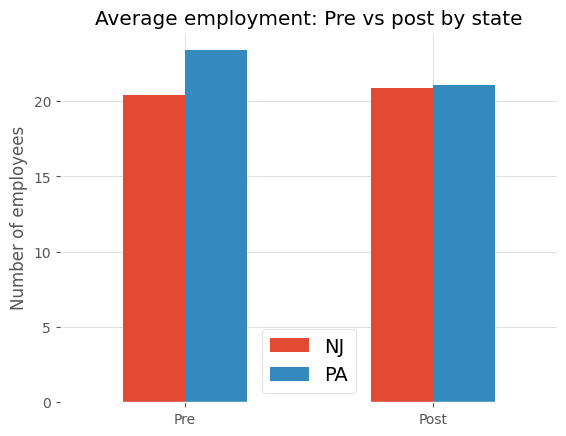

In [94]:
means =\
(
    pd
    .DataFrame({'NJ': [mean_nj_pre,
                       mean_nj_post],
                'PA': [mean_pa_pre,
                       mean_pa_post]},
               index=['Pre',
                      'Post'])
)

(
    means
    .plot(kind='bar')
)

(
    plt
    .title('Average employment: Pre vs post by state')
)

(
    plt
    .ylabel('Number of employees')
)

(
    plt
    .xticks(rotation=0)
)

(
    plt
    .show()
)

## <a id = "p3"></a><font color = blue> 👉 Big Questions 3</font>  [back to table of contents](#top)

### <font color = green> ANALYTICS CONTEXT
    
> Consider that you are a data scientist working at the World Bank. You are currently working on analyzing the economic impact of the 1990 German reunification. Specifically, you want to estimate the impact of the reunification on the GDP per capita of West Germany, by comparing the post-reunification trajectory of West Germany to a synthetic control region constructed from other countries.

#### Data collected:

- `code`: numeric country code uniquely identifying each country (e.g., 1 = USA, 2 = UK, etc.)
- `country`: name of country (e.g., "USA", "UK", "West Germany", etc.)
- `year`: year of observation (e.g., 1960, 1970, ..., 2000)
- `gdp`: GDP per capita (national income per person, in local currency or international dollars)
- `infrate`: inflation rate (%) (annual percentage change in consumer prices)
- `trade`: trade openness as a percentage of GDP (%) (sum of exports and imports divided by GDP, times 100)
- `schooling`: average years of schooling (mean years of education for the adult population)
- `invest60`: investment rate in the 1960s (%) (average gross capital formation as a percent of GDP, 1960–1969)
- `invest70`: investment rate in the 1970s (%) (average gross capital formation as a percent of GDP, 1970–1979)
- `invest80`: investment rate in the 1980s (%) (average gross capital formation as a percent of GDP, 1980–1989)
- `industry`: industry share (%) (share of industry in GDP, as a percentage)

### <mark> Dataset </mark> https://talktoroh.com/s/reunification_of_germany.csv

### <font color = red> Below are the lines of code that lead to an answer: </font>

### <font color = red> IMPORT

In [95]:
# Import the dataset
data3 =\
(
    pd
    .read_csv("https://talktoroh.com/s/reunification_of_germany.csv")
)

# Quick look at the data
(
    data3
    .info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   code       748 non-null    int64  
 1   country    748 non-null    object 
 2   year       748 non-null    int64  
 3   gdp        748 non-null    int64  
 4   infrate    727 non-null    float64
 5   trade      646 non-null    float64
 6   schooling  151 non-null    float64
 7   invest60   17 non-null     float64
 8   invest70   17 non-null     float64
 9   invest80   17 non-null     float64
 10  industry   541 non-null    float64
dtypes: float64(7), int64(3), object(1)
memory usage: 64.4+ KB


In [96]:
(
    data3
    .head(3)
)

,code,country,year,gdp,infrate,trade,schooling,invest60,invest70,invest80,industry
0,1,USA,1960,2879,NaN,9.693181,43.799999,NaN,NaN,NaN,NaN
1,1,USA,1961,2929,1.075182,9.444655,NaN,NaN,NaN,NaN,NaN
2,1,USA,1962,3103,1.116071,9.429324,NaN,NaN,NaN,NaN,NaN


### <font color = red> WRANGLE

In [97]:
# Focus on West Germany and other countries, and normalize GDP per capita
data3_long =\
(
    data3
    .copy()
)

data3_long["year"] =\
(
    data3_long
    ["year"]
    .astype(int)
)

# Normalize GDP per country (pre-1990 mean)
data3_long["normalized_gdp"] =\
(
    data3_long
    .groupby("country")
    ["gdp"]
    .transform(
        lambda x: x / x[data3_long.loc[x.index, "year"] < 1990].mean()
    )
)

# Identify treated and donor countries
treated_country = "West Germany"

donor_countries = [c for c in data3_long["country"].unique() if c != treated_country]

# Create pre-reunification arrays
pre_reunification =\
(
    data3_long[data3_long["year"] < 1990]
)

years_pre = sorted(pre_reunification["year"].unique())

west_germany_pre =\
(
    pre_reunification
    [pre_reunification["country"] == treated_country]
    .set_index("year")
    .loc[years_pre, "normalized_gdp"]
    .values
)

donors_pre =\
(
    pre_reunification
    [pre_reunification["country"].isin(donor_countries)]
    .pivot(index="year",
           columns="country",
           values="normalized_gdp")
    .loc[years_pre]
    .values
)

# Calculate weights for synthetic control
weights =\
(
    calculate_weights(donors_pre,
                      west_germany_pre)
)

# Build synthetic control for all years
years_all = sorted(data3_long["year"].unique())

donors_all =\
(
    data3_long
    [data3_long["country"].isin(donor_countries)]
    .pivot(index="year",
           columns="country",
           values="normalized_gdp")
    .loc[years_all]
    .values
)

synthetic_germany =\
(
    donors_all @ weights
)

observed_germany =\
(
    data3_long
    [data3_long["country"] == treated_country]
    .set_index("year")
    .loc[years_all, "normalized_gdp"]
    .values
)

# Build comparison DataFrame
comparison_df =\
(
    pd.DataFrame({"year": years_all,
                  "observed_germany": observed_germany,
                  "synthetic_germany": synthetic_germany})
)

comparison_df["effect"] =\
(
    comparison_df["observed_germany"] - comparison_df["synthetic_germany"]
)

comparison_df

,year,observed_germany,synthetic_germany,effect
0,1960,0.279565,0.269411,0.010154
1,1961,0.292295,0.285329,0.006965
2,1962,0.309309,0.301057,0.008252
3,1963,0.319468,0.315960,0.003508
4,1964,0.343459,0.335957,0.007501
5,1965,0.367817,0.358463,0.009354
6,1966,0.387768,0.386611,0.001157
7,1967,0.396703,0.408512,-0.011809
8,1968,0.437096,0.443702,-0.006606
9,1969,0.489361,0.486716,0.002645


### <font color = red> VISUALIZATION

In [98]:
# Panel A: Time-series plot of normalized GDP for all countries, West Germany highlighted
panel_a3 =\
(
    ggplot(data3_long,
           aes(x="year",
               y="normalized_gdp",
               group="country"))
    + geom_line(color="grey",
                alpha=0.3)
    + geom_line(data=data3_long[data3_long["country"] == treated_country],
                color="red",
                size=1.5)
    + labs(title="Panel A: Normalized GDP (West Germany highlighted)")
)

(
    panel_a3
    .show()
)

In [99]:
# Panel B: Observed vs synthetic West Germany GDP
panel_b3 =\
(
    ggplot(comparison_df,
           aes(x="year"))
    + geom_line(aes(y="observed_germany"),
                color="red",
                size=1.1)
    + geom_line(aes(y="synthetic_germany"),
                color="blue",
                size=1.1)
    + labs(title="Panel B: Observed vs synthetic West Germany GDP")
)

(
    panel_b3
    .show()
)

In [100]:
# Panel C: Causal effect (difference)
panel_c3 =\
(
    ggplot(comparison_df,
           aes(x="year",
               y="effect"))
    + geom_line(color="purple")
    + geom_hline(yintercept=0,
                 color="black")
    + labs(title="Panel C: Estimated effect of reunification on West Germany")
)

(
    panel_c3
    .show()
)

In [101]:
# Panel D: Donor weights
df_weights =\
(
    pd
    .DataFrame({"country": donor_countries,
                "weight": weights})
    .sort_values("weight",
                 ascending=False)
)

panel_d3 =\
(
    ggplot(df_weights,
           aes(x="country",
               y="weight"))
    + geom_bar(stat="identity",
               fill="orange")
    + labs(title="Panel D: Donor country weights (synthetic control)")
)

(
    panel_d3
    .show()
)

### <font color = red> What is your econometric assessment of the causal effects? </font>

In [102]:
# Average and maximum effect post-1990
post_effects =\
(
    comparison_df
    .loc[comparison_df["year"] >= 1990, "effect"]
)

print(f"Average post-reunification effect: {post_effects.mean() * 100:.2f} percentage points.")
print(f"Maximum post-reunification effect: {post_effects.min() * 100:.2f} percentage points.")

Average post-reunification effect: -16.74 percentage points.
Maximum post-reunification effect: -44.45 percentage points.


    IMPORTANT NOTE: 

### <font color = orange> <center> Prior to submitting, ensure that you execute the following command to present your workspace.

### <font color = orange> <center> Before submission, ensure that your responses are entered into the designated cells provided for answering.

In [103]:
%whos

Variable                                      Type         Data/Info
--------------------------------------------------------------------
GGBunch                                       type         <class 'lets_plot.plot.plot.GGBunch'>
LetsPlot                                      type         <class 'lets_plot.LetsPlot'>
aes                                           function     <function aes at 0x113217880>
arrow                                         function     <function arrow at 0x11326b060>
as_discrete                                   function     <function as_discrete at 0x1132682c0>
calculate_weights                             function     <function calculate_weights at 0x11028f100>
cols                                          list         n=3
comparison_DF                                 DataFrame             Time  observed_n<...>               1.156626  
comparison_DF_with_effects                    DataFrame             Time  observed_n<...>6  -0.042617  -0.044302  
comp

### <font color = green> 💯 Thank you for putting effort into the analytics exercise problem set 😊